### CLASSIFICATION CASE STUDY - ENSEMBLE MODELS

### IMPORT LIBRARIES

In [1]:
# IMPORTING REQUIRED PACKAGES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "white")

### LOAD DATA FROM FINAL CSV

In [2]:
train = pd.read_csv("final_train.csv")

In [3]:
X = train.drop(columns = ["LoanStatus"])
y = train.LoanStatus

In [4]:
X = pd.get_dummies(X)

In [5]:
X

,Dependents,LoanAmountTerm,CreditHistory,LoanAmountLog,IncomeLog,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,SelfEmployed_No,SelfEmployed_Yes,PropertyArea_Rural,PropertyArea_Semiurban,PropertyArea_Urban
0,0,360.0,1.0,4.844187,8.674026,0,1,1,0,1,0,1,0,0,0,1
1,1,360.0,1.0,4.852030,8.714568,0,1,0,1,1,0,1,0,1,0,0
2,0,360.0,1.0,4.189655,8.006368,0,1,0,1,1,0,0,1,0,0,1
3,0,360.0,1.0,4.787492,8.505323,0,1,0,1,0,1,1,0,0,0,1
4,0,360.0,1.0,4.948760,8.699515,0,1,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,0,360.0,1.0,4.262680,7.972466,1,0,1,0,1,0,1,0,1,0,0
560,3,180.0,1.0,3.688879,8.320205,0,1,0,1,1,0,1,0,1,0,0
561,1,360.0,1.0,5.533389,9.025456,0,1,0,1,1,0,1,0,0,0,1
562,2,360.0,1.0,5.231109,8.933664,0,1,0,1,1,0,1,0,0,0,1


In [6]:
X.columns

Index(['Dependents', 'LoanAmountTerm', 'CreditHistory', 'LoanAmountLog',
       'IncomeLog', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Education_Graduate', 'Education_Not Graduate',
       'SelfEmployed_No', 'SelfEmployed_Yes', 'PropertyArea_Rural',
       'PropertyArea_Semiurban', 'PropertyArea_Urban'],
      dtype='object')

### SPLIT DATA INTO TRAIN AND TEST

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### BAGGING - RANDOM FOREST CLASSIFIER

In [8]:
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

In [9]:
model = RandomForestClassifier(n_estimators = 3, max_depth = 3, random_state = 10)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=3, random_state=10)

In [10]:
model.score(X_train, y_train)

0.8226164079822617

In [11]:
y_pred = model.predict(X_test)

In [12]:
accuracy_score(y_test, y_pred)

0.7876106194690266

In [13]:
# PRINT INTERNAL DECISION TREES
for count, tree in enumerate(model.estimators_):
    # PRINT TREE FOR EACH CLASSIFIER
    tree_rules = export_text(tree, feature_names = list(X_train.columns))
    print("Tree   :", count + 1)
    print(tree_rules)

Tree   : 1
|--- Education_Graduate <= 0.50
|   |--- LoanAmountLog <= 4.89
|   |   |--- IncomeLog <= 8.88
|   |   |   |--- class: 1.0
|   |   |--- IncomeLog >  8.88
|   |   |   |--- class: 0.0
|   |--- LoanAmountLog >  4.89
|   |   |--- IncomeLog <= 9.07
|   |   |   |--- class: 0.0
|   |   |--- IncomeLog >  9.07
|   |   |   |--- class: 1.0
|--- Education_Graduate >  0.50
|   |--- Married_Yes <= 0.50
|   |   |--- CreditHistory <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- CreditHistory >  0.50
|   |   |   |--- class: 1.0
|   |--- Married_Yes >  0.50
|   |   |--- PropertyArea_Semiurban <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- PropertyArea_Semiurban >  0.50
|   |   |   |--- class: 1.0

Tree   : 2
|--- CreditHistory <= 0.50
|   |--- LoanAmountTerm <= 240.00
|   |   |--- Dependents <= 2.50
|   |   |   |--- class: 0.0
|   |   |--- Dependents >  2.50
|   |   |   |--- class: 1.0
|   |--- LoanAmountTerm >  240.00
|   |   |--- Married_Yes <= 0.50
|   |   |   |--- class: 0.0
|   |   |--

# BOOSTING - GRADIENTBOOSTINGCLASSIFIER

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

In [15]:
model = GradientBoostingClassifier(n_estimators = 15, max_depth = 10)
model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=15)

In [16]:
model.score(X_train, y_train)

0.9356984478935698

In [17]:
y_pred = model.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.7699115044247787

In [19]:
confusion_matrix(y_test, y_pred)

array([[14, 21],
       [ 5, 73]], dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.40      0.52        35
           1       0.78      0.94      0.85        78

    accuracy                           0.77       113
   macro avg       0.76      0.67      0.68       113
weighted avg       0.76      0.77      0.75       113



In [21]:
errors = {}
tree_counts = [3, 4, 5, 8, 10, 15, 20, 25]
for count in tree_counts:
    model = GradientBoostingClassifier(n_estimators = count)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    errors[count] = 1 - score  # ERRORS

In [22]:
errors

{3: 0.2566371681415929,
 4: 0.22123893805309736,
 5: 0.22123893805309736,
 8: 0.22123893805309736,
 10: 0.22123893805309736,
 15: 0.23008849557522126,
 20: 0.23008849557522126,
 25: 0.22123893805309736}

Text(0, 0.5, 'Error')

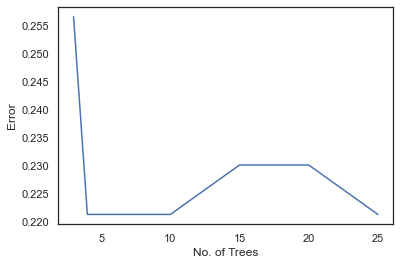

In [23]:
# DRAW GRAPH TO SHOW ERROR RATE AND NUMBER OF TREES
plt.plot(list(errors.keys()), list(errors.values()))
plt.xlabel("No. of Trees")
plt.ylabel("Error")

### STACKING - STACKINGCLASSIFIER

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [25]:
estimators = [
    ('lr',  LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('svc', SVC()),
]

In [26]:
clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [28]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [29]:
X_test_scaled = ss.transform(X_test)

In [30]:
clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier()),
                               ('svc', SVC())],
                   final_estimator=DecisionTreeClassifier())

In [31]:
clf.score(X_test_scaled, y_test)

0.7163120567375887

In [32]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [33]:
estimators = [
    ('lr',  LogisticRegression()),
    ('knn', KNeighborsClassifier(n_neighbors=4)),
    ('svc', SVC()),
]

In [34]:
clf = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

In [36]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [37]:
X_test_scaled = ss.transform(X_test)

In [38]:
clf.fit(X_train_scaled, y_train)

StackingClassifier(estimators=[('lr', LogisticRegression()),
                               ('knn', KNeighborsClassifier(n_neighbors=4)),
                               ('svc', SVC())],
                   final_estimator=DecisionTreeClassifier())

In [39]:
clf.score(X_test_scaled, y_test)

0.7304964539007093